In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

# sequence-miner vs spmf

In [23]:
# df = pd.read_csv('sm_vs_spmf_fifa.csv')
# df = pd.read_csv('sm_vs_spmf_bms_webview.csv')
df = pd.read_csv('sm_vs_spmf_bible.csv')


In [24]:
miner_spade = df[df['algorithm'] == 'SPADE'][df['program'] == 'miner']
spmf_spade = df[df['algorithm'] == 'SPADE'][df['program'] == 'spmf']
miner_ps = df[df['algorithm'] == 'PrefixSpan'][df['program'] == 'miner']
spmf_ps = df[df['algorithm'] == 'PrefixSpan'][df['program'] == 'spmf']

/home/napiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/napiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/napiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/napiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [25]:
miner_spade

,program,algorithm,input_file,all_sequences,min_support,frequenct_sequences,time,real_time
2,miner,SPADE,bible.spmf,36370,0.1,174,30220,30874
6,miner,SPADE,bible.spmf,36370,0.2,37,26695,27221
10,miner,SPADE,bible.spmf,36370,0.3,15,26221,26619


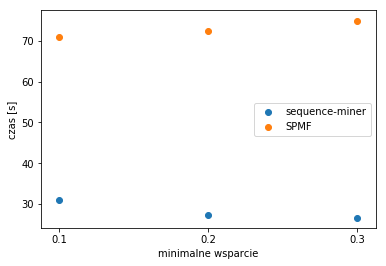

In [26]:
plt.scatter(miner_spade['min_support'].map(lambda x : str(x)), miner_spade['real_time'].map(lambda x : 0.001*x), label='sequence-miner')
plt.scatter(spmf_spade['min_support'].map(lambda x : str(x)), spmf_spade['real_time'].map(lambda x : 0.001*x), label='SPMF')
plt.ylabel('czas [s]')
plt.xlabel('minimalne wsparcie')
plt.legend()
plt.savefig('bible_spade.png')

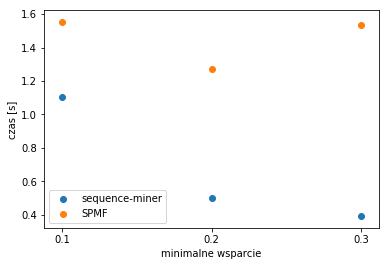

In [27]:
plt.scatter(miner_ps['min_support'].map(lambda x : str(x)), miner_ps['real_time'].map(lambda x : 0.001*x), label='sequence-miner')
plt.scatter(spmf_ps['min_support'].map(lambda x : str(x)), spmf_ps['real_time'].map(lambda x : 0.001*x), label='SPMF')
plt.ylabel('czas [s]')
plt.xlabel('minimalne wsparcie')
plt.legend()
plt.savefig('bible_prefixspan.png')

# prefixspan vs spade

In [77]:
with open('/home/lukasz/Documents/med/sequence-miner/data/gen_1st_10k.spmf', 'r') as f:
    d = f.read()

In [79]:
items = d.split('\n')

In [81]:
c = 0
for i in items:
    l = i.split('-1')
    try:
        l.remove('-2')
    except:
        pass
    c += len(l)
c / 10000

13.8973

In [75]:
res = filter(lambda i: not i.startswith('-'), items)

In [76]:
len(set(list(res)))

32066

sm_vs_spmf_gen.csv


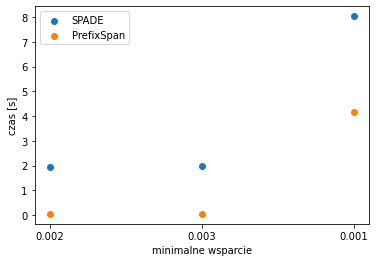

In [42]:
for f in ['sm_vs_spmf_gen.csv']:
    print(f)
    df = pd.read_csv(f)
    spade = df[df['algorithm'] == 'SPADE'][df['program'] == 'miner']
    ps = df[df['algorithm'] == 'PrefixSpan'][df['program'] == 'miner']

    plt.scatter(spade['min_support'].map(lambda x : str(x)), spade['time'].map(lambda x : 0.001*x), label='SPADE')
    plt.scatter(ps['min_support'].map(lambda x : str(x)), ps['time'].map(lambda x : 0.001*x), label='PrefixSpan')
    plt.ylabel('czas [s]')
    plt.xlabel('minimalne wsparcie')
    plt.legend()
    plt.show()

In [ ]:
for f in ['spade_dfs_bfs_bible.csv']:
    print(f)
    df = pd.read_csv(f)
    print(df)
    dfs = df[df['algorithm'] == 'SPADE_dfs']
    bfs = df[df['algorithm'] == 'SPADE_bfs']

    plt.scatter(dfs['min_support'].map(lambda x : str(x)), dfs['time'].map(lambda x : 0.001*x), label='DFS')
    plt.scatter(bfs['min_support'].map(lambda x : str(x)), bfs['time'].map(lambda x : 0.001*x), label='BFS')
    plt.ylabel('czas [s]')
    plt.xlabel('minimalne wsparcie')
    plt.legend()
    plt.savefig('spade_dfs_bfs_bible.png')